In [46]:
import logreader as lr
from pathlib import Path
import matplotlib.pyplot as plt
import pickle
import tifffile
import glob
from tqdm import tqdm
import numpy as np

In [47]:
#PARAMETERS
animal = '441394_ribolla'
animal_num = animal.split('_')[0]
date = '20230307'


session_path = Path(f'/ceph/imaging1/arie/{animal}/{date}_{animal_num}')
save_path =  Path(f'/ceph/imaging1/davide/2p_data/{animal}/{date}')

tif_file = glob.glob(str(session_path)+'/*.tif')[0]
log_file = glob.glob(str(session_path)+'/*.b64')[0]

print(log_file)
print(tif_file)

/ceph/imaging1/arie/441394_ribolla/20230307_441394/20230307-185037_069.b64
/ceph/imaging1/arie/441394_ribolla/20230307_441394/20230307_441394_00001.tif


# Decode session log and tif header

In [48]:
decoded_log = lr.create_bp_structure(log_file)

Decoding log file


  0%|          | 0/1146264 [00:00<?, ?it/s]

In [45]:
tif_header = lr.read_tif_header(tif_file)

0it [00:00, ?it/s]

In [33]:
frames = tif_header['frame_ts']
i2c_data =tif_header['i2c_data']

In [34]:
digital_in = decoded_log['digitalIn'].astype(int)
digital_out = decoded_log['digitalOut'].astype(int)
scanner_digital = digital_in[:,6]
log_times = decoded_log['startTS'].astype(float)
barcode = digital_out[:,4]

In [35]:
lr.compute_sync_shift(scanner_digital,log_times,frames)

82.76848785848

In [36]:
tm = lr.build_trial_matrix(digital_in,digital_out)

ValueError: zero-size array to reduction operation minimum which has no identity

# Arrange and plot chanel data

In [49]:
for k in decoded_log.keys():
    print(f'{k}: {decoded_log[k].shape}')

analog: (1146264, 8)
digitalIn: (1146264, 16)
digitalOut: (1146264, 8)
startTS: (1146264,)
transmitTS: (1146264,)
longVar: (1146264, 8)
packetNums: (1146264,)


In [38]:
labels_in = ['empty','empty','wheelA','wheelB','wheelC','IR_camera','scanner','sound','unknown','reward_zone','environment1',
             'environment2','environment3_broken','tunnel1','tunnel2','environment3']
labels_out = ['valve','empty','IR_lED_sync','empty','barcode','IR_LED','lick','empty']

In [39]:
digital_in = decoded_log['digitalIn'].astype(int)
digital_out = decoded_log['digitalOut'].astype(int)
digital_scan_signal = digital_in[:,6]
log_times = decoded_log['startTS']
#sync_times = lr.compute_sync_times(digital_scan_signal,log_times,frames)

37627


Text(0.5, 0, 'time (logifle units)')

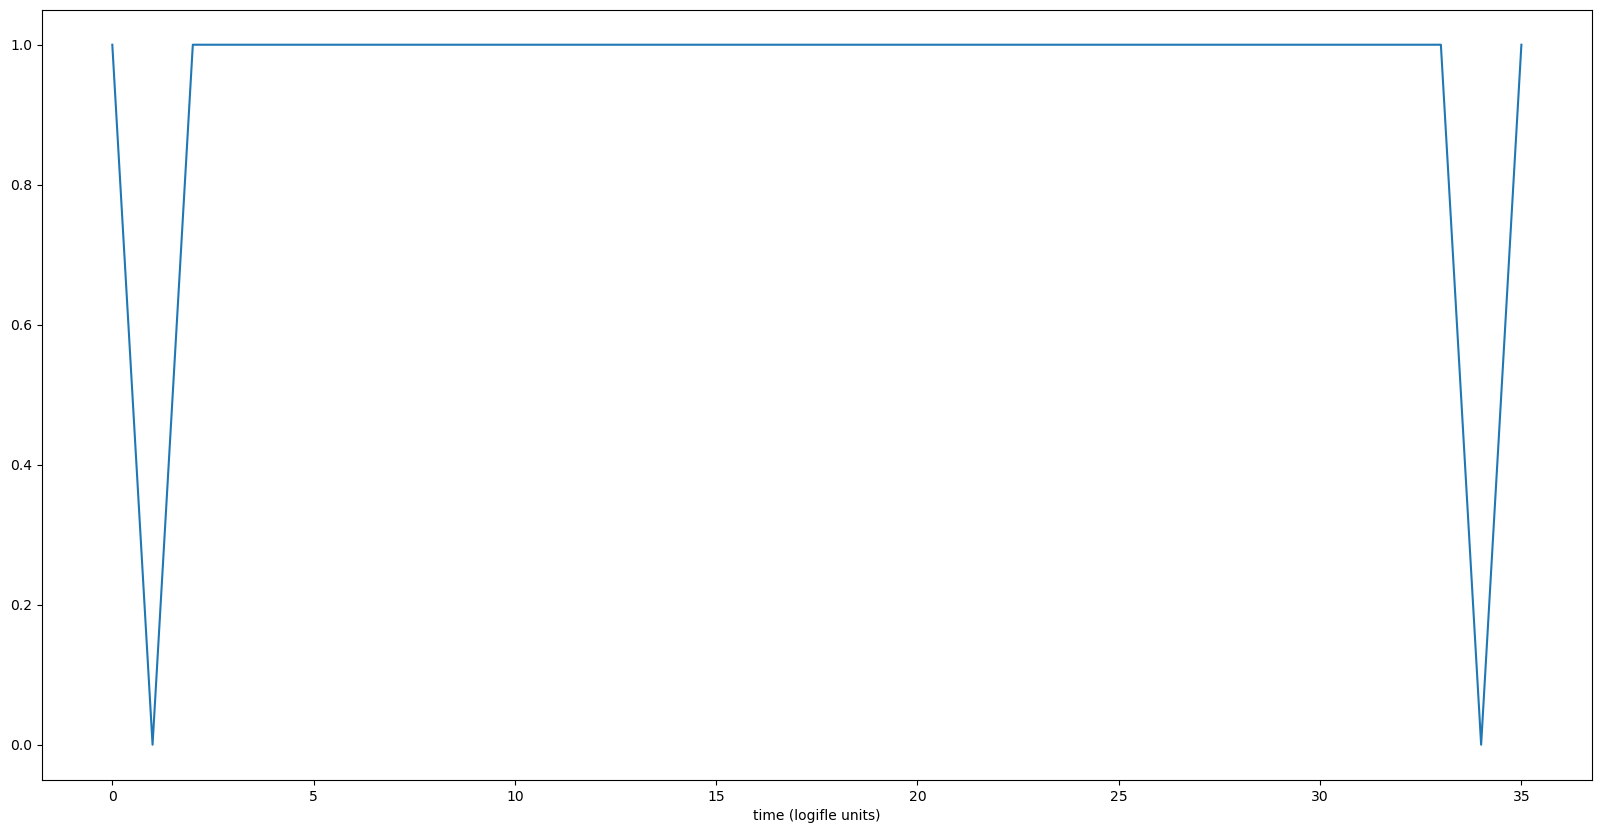

In [84]:
channel = 6
plt.figure(figsize=(20,10))
plt.plot(digital_in[34004:34040,channel])
#onsets = lr.compute_onsets(digital_in[:,channel])
#plt.eventplot(onsets,color='r')
print(len(onsets))
plt.xlabel('time (logifle units)')
#plt.title(f'Average time on {np.mean(digital_in[34000:34010,channel]):.3f}')

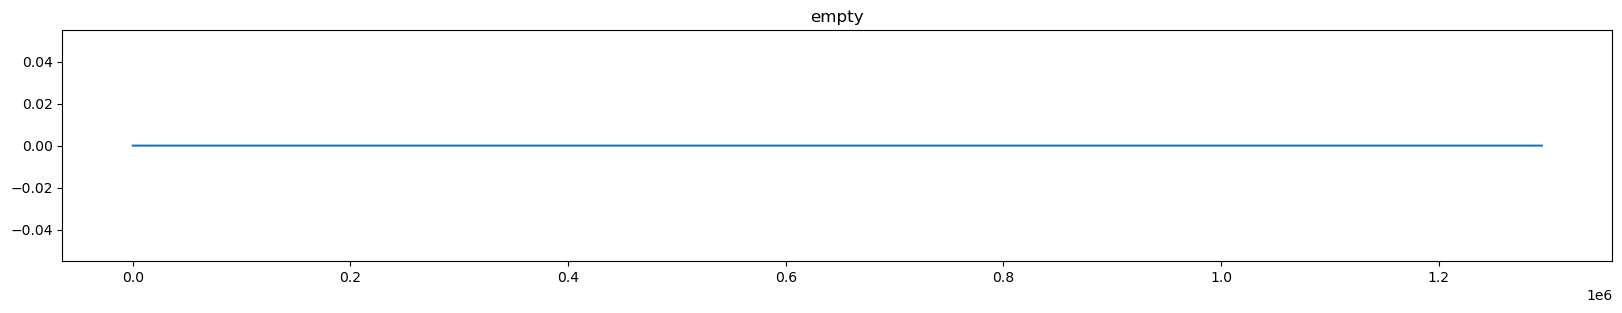

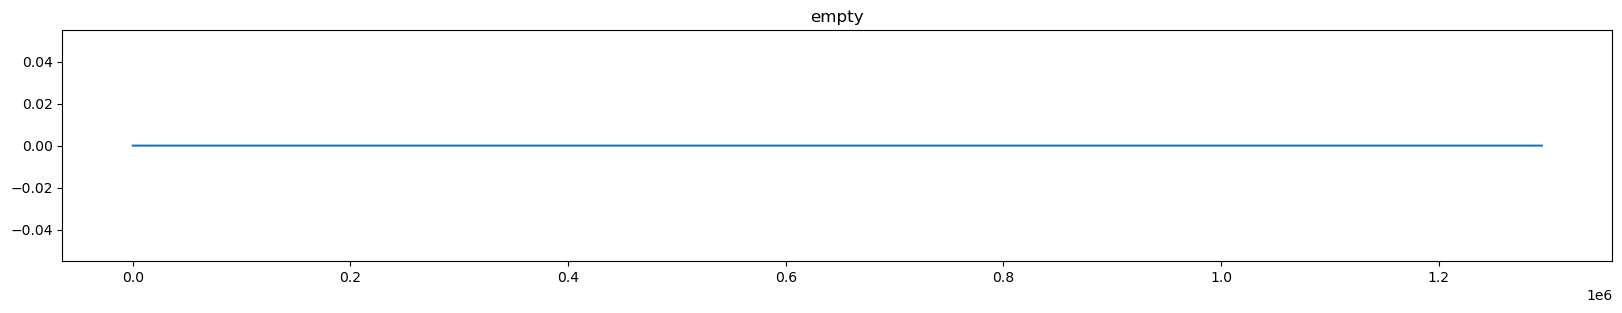

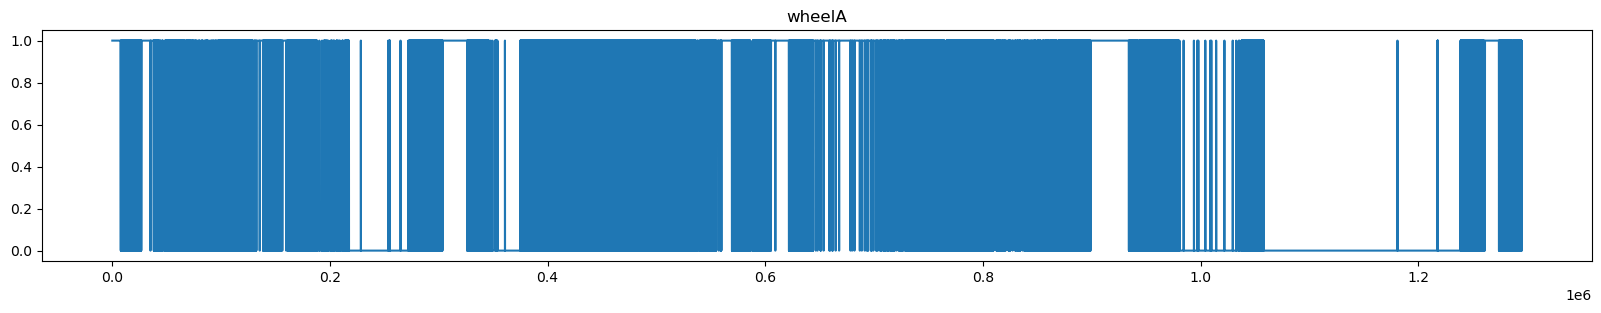

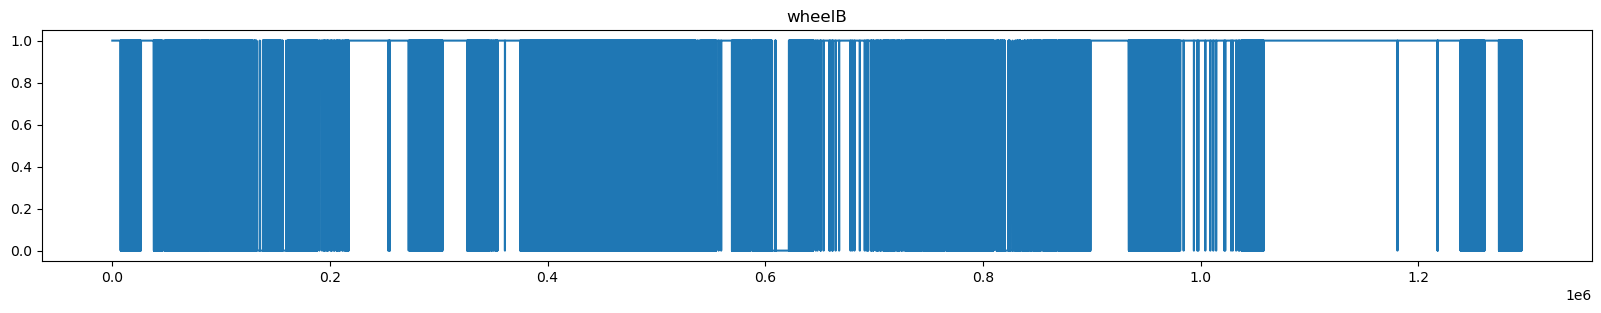

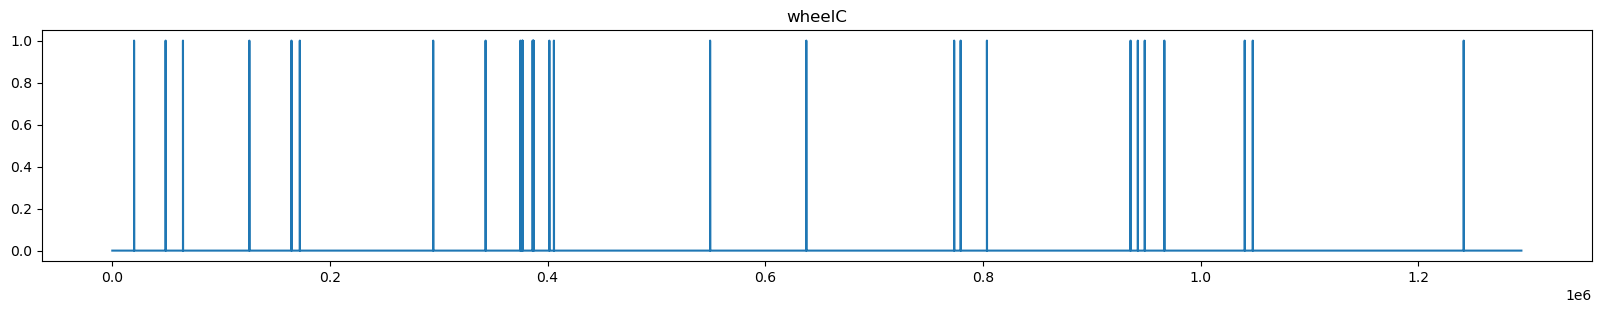

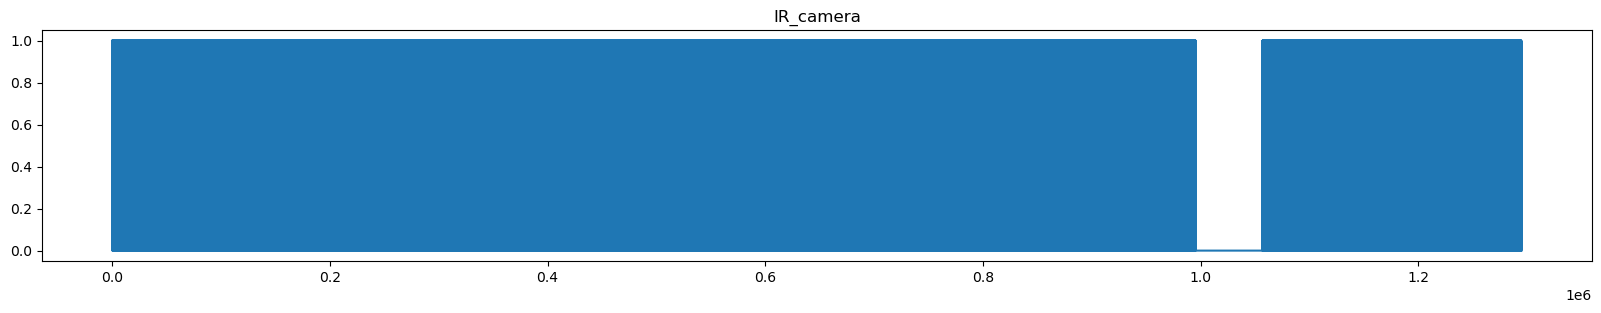

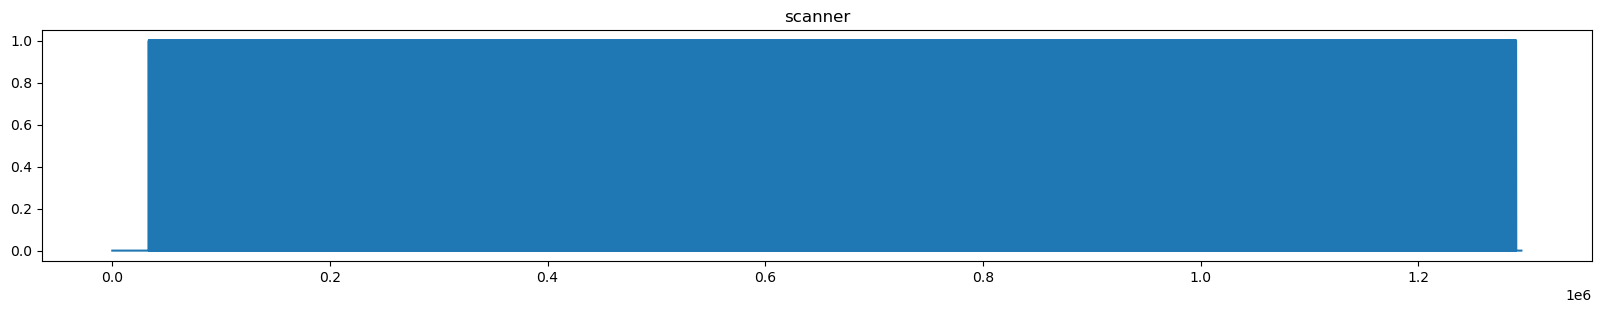

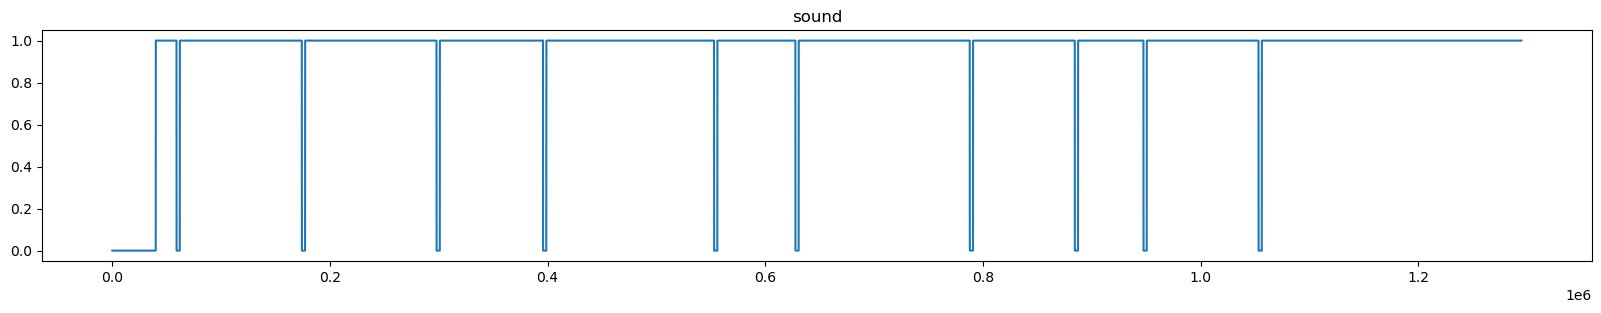

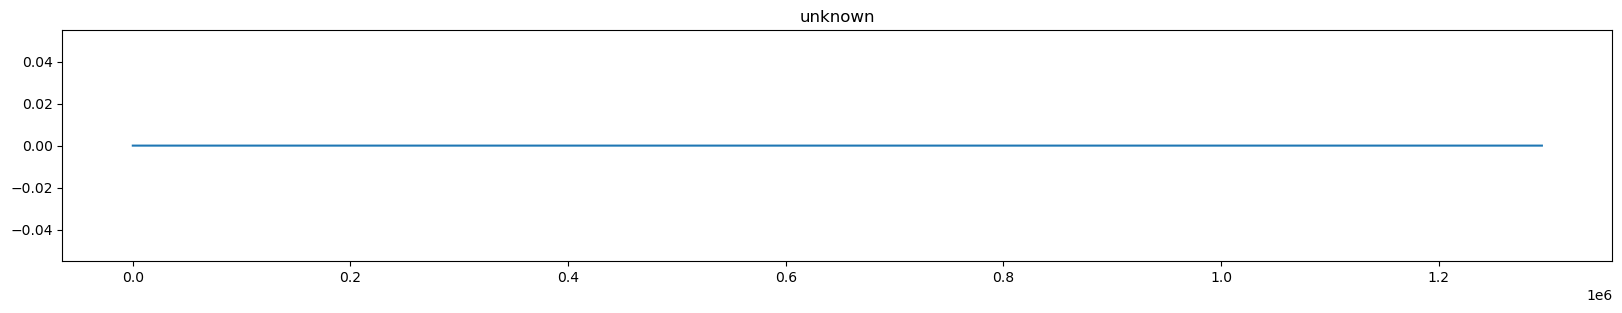

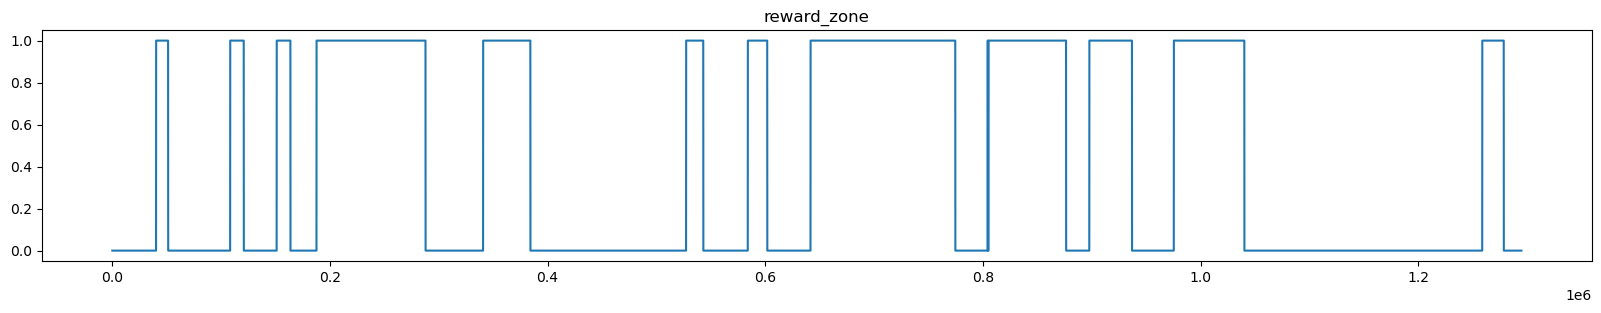

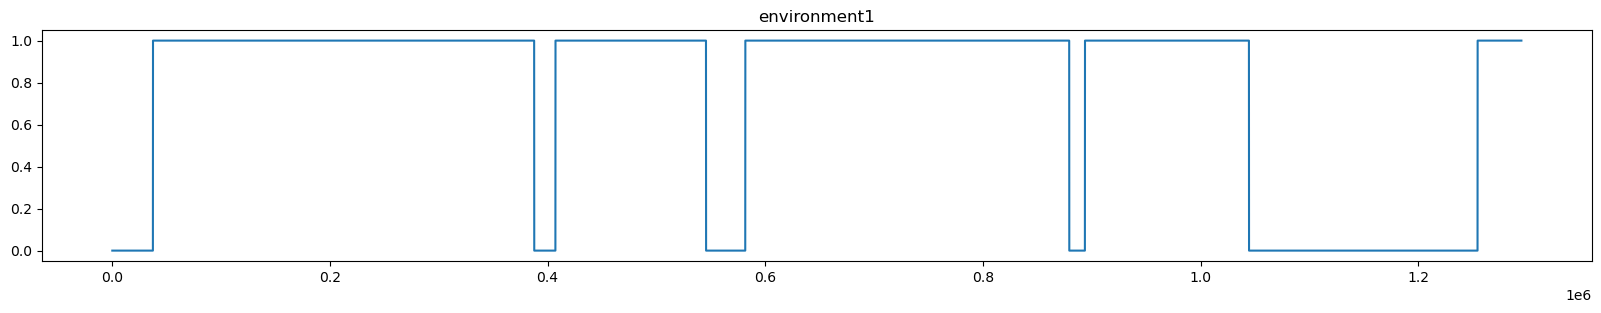

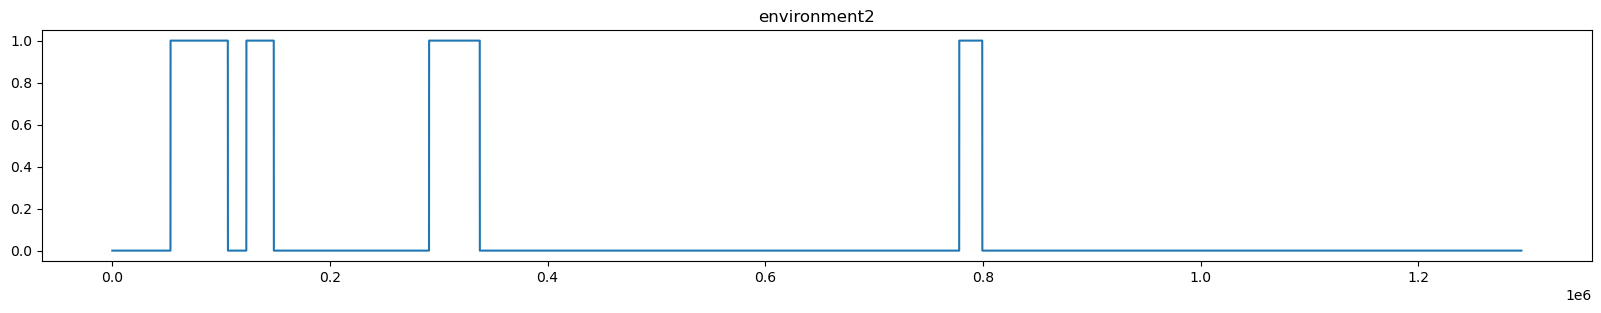

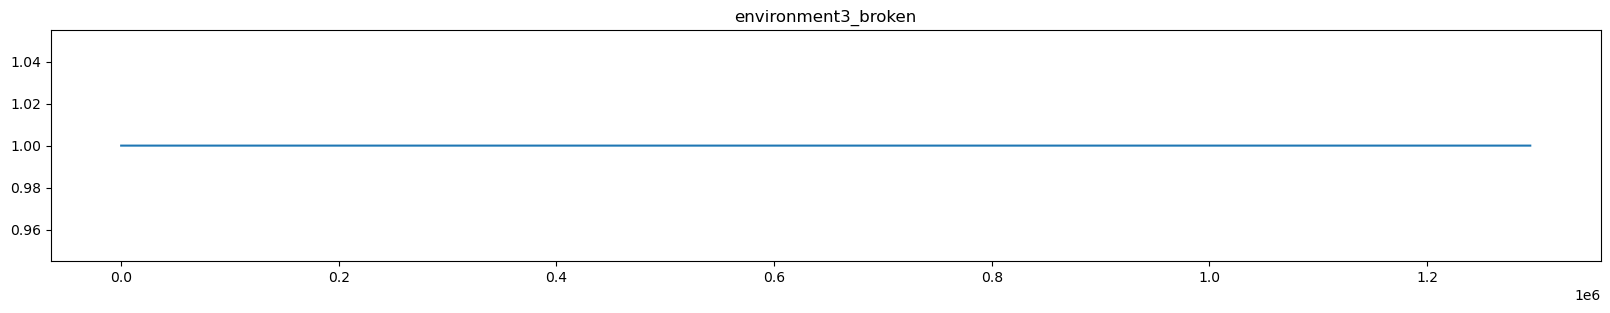

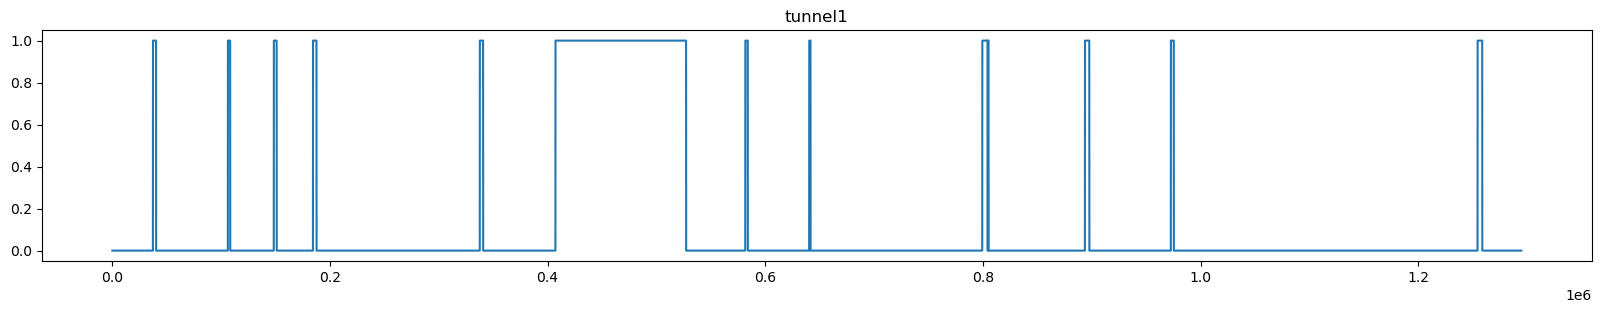

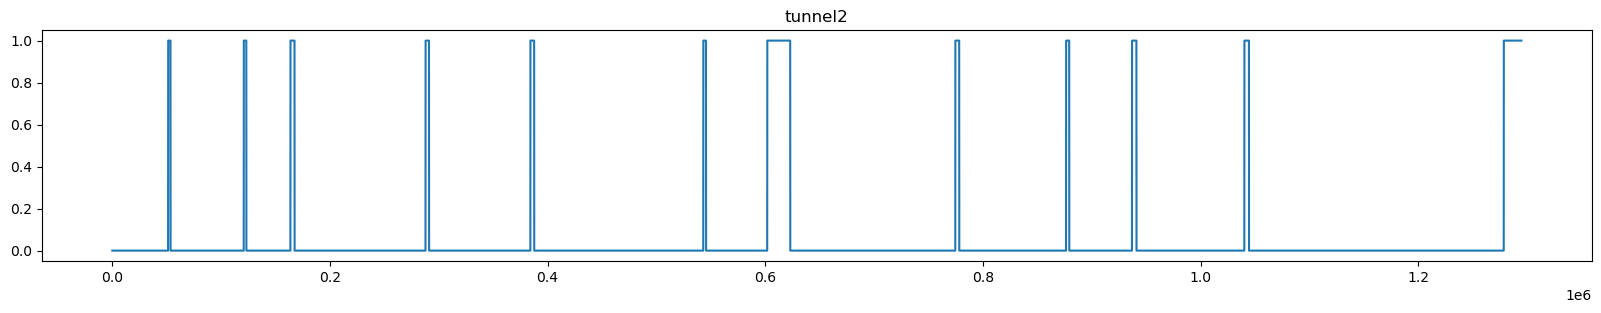

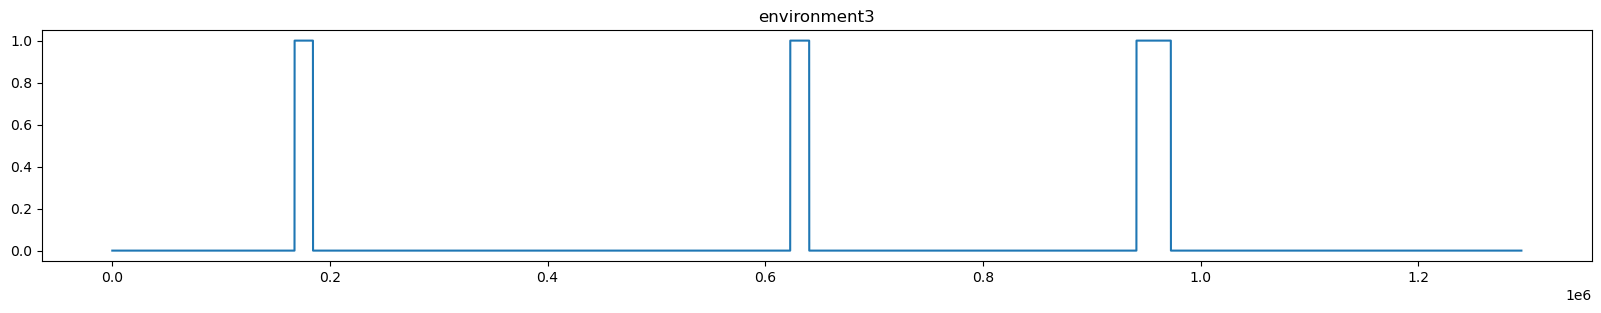

In [41]:
# plot all channels
for i,l in enumerate(labels_in):
    plt.figure(figsize=(20,3))
    plt.title(f'{l}')
    plt.plot(digital_in[:,i])